## Capstone project:1 Real Estate Case Study

### Import data

In [1]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import the train and test dataset
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [3]:
df_train.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


In [4]:
df_test.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,255504,NaN,140,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,...,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299
1,252676,NaN,140,1,23,Maine,ME,Auburn,Auburn City,City,...,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377
2,276314,NaN,140,15,42,Pennsylvania,PA,Pine City,Millerton,Borough,...,41.62426,44.50000,22.86213,453.11959,1879.0,0.81897,0.59961,0.01746,0.01358,0.10026
3,248614,NaN,140,231,21,Kentucky,KY,Monticello,Monticello City,City,...,44.81200,48.00000,21.03155,263.94320,1081.0,0.84609,0.56953,0.05492,0.04694,0.12489
4,286865,NaN,140,355,48,Texas,TX,Corpus Christi,Edroy,Town,...,40.66618,42.66667,21.30900,709.90829,2956.0,0.79077,0.57620,0.01726,0.00588,0.16379


In [5]:
df_train.shape

(27321, 80)

In [6]:
df_test.shape

(11709, 80)

In [7]:
# Decription of data in thedataframe
df_train.describe()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,zip_code,area_code,lat,lng,ALand,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
count,27321.000000,0.0,27321.0,27321.000000,27321.000000,27321.000000,27321.000000,27321.000000,27321.000000,2.732100e+04,...,27115.000000,27115.000000,27115.000000,27115.000000,27115.000000,27053.000000,27130.000000,27130.000000,27130.000000,27130.000000
mean,257331.996303,NaN,140.0,85.646426,28.271806,50081.999524,596.507668,37.508813,-91.288394,1.295106e+08,...,40.319803,40.355099,22.178745,544.238432,2208.761903,0.640434,0.508300,0.047537,0.019089,0.100248
std,21343.859725,NaN,0.0,98.333097,16.392846,29558.115660,232.497482,5.588268,16.343816,1.275531e+09,...,5.886317,8.039585,2.540257,283.546896,1089.316999,0.226640,0.136860,0.037640,0.020796,0.049055
min,220342.000000,NaN,140.0,1.000000,1.000000,602.000000,201.000000,17.929085,-165.453872,4.113400e+04,...,16.008330,13.250000,0.556780,0.664700,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,238816.000000,NaN,140.0,29.000000,13.000000,26554.000000,405.000000,33.899064,-97.816067,1.799408e+06,...,36.892050,34.916670,21.312135,355.995825,1471.000000,0.502780,0.425102,0.020810,0.004530,0.065800
50%,257220.000000,NaN,140.0,63.000000,28.000000,47715.000000,614.000000,38.755183,-86.554374,4.866940e+06,...,40.373320,40.583330,22.514410,503.643890,2066.000000,0.690840,0.526665,0.038840,0.013460,0.095205
75%,275818.000000,NaN,140.0,109.000000,42.000000,77093.000000,801.000000,41.380606,-79.782503,3.359820e+07,...,43.567120,45.416670,23.575260,680.275055,2772.000000,0.817460,0.605760,0.065100,0.027487,0.129000
max,294334.000000,NaN,140.0,840.000000,72.000000,99925.000000,989.000000,67.074018,-65.379332,1.039510e+11,...,79.837390,82.250000,30.241270,6197.995200,27250.000000,1.000000,1.000000,0.714290,0.714290,1.000000


In [8]:
# Decription of data in thedataframe
df_test.describe()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,zip_code,area_code,lat,lng,ALand,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
count,11709.000000,0.0,11709.0,11709.000000,11709.000000,11709.000000,11709.000000,11709.000000,11709.000000,1.170900e+04,...,11613.000000,11613.000000,11613.000000,11613.000000,11613.000000,11587.000000,11625.000000,11625.000000,11625.000000,11625.000000
mean,257525.004783,NaN,140.0,85.710650,28.489196,50123.418396,593.598514,37.405491,-91.340229,1.095500e+08,...,40.111999,40.131864,22.148145,550.411243,2233.003186,0.634194,0.505632,0.047960,0.019346,0.099191
std,21466.372658,NaN,0.0,99.304334,16.607262,29775.134038,232.074263,5.625904,16.407818,7.624940e+08,...,5.851192,7.972026,2.554907,280.992521,1072.017063,0.232232,0.139774,0.038693,0.021428,0.048525
min,220336.000000,NaN,140.0,1.000000,1.000000,601.000000,201.000000,17.965835,-166.770979,8.299000e+03,...,15.360240,12.833330,0.737110,0.251910,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,238819.000000,NaN,140.0,29.000000,13.000000,25570.000000,404.000000,33.919813,-97.816561,1.718660e+06,...,36.729210,34.750000,21.270920,363.225840,1499.000000,0.492500,0.422020,0.020890,0.004500,0.064590
50%,257651.000000,NaN,140.0,61.000000,28.000000,47362.000000,612.000000,38.618092,-86.643344,4.835000e+06,...,40.196960,40.333330,22.472990,509.103610,2099.000000,0.687640,0.525270,0.038680,0.013870,0.094350
75%,276300.000000,NaN,140.0,109.000000,42.000000,77406.000000,787.000000,41.232973,-79.697311,3.204540e+07,...,43.496490,45.333330,23.549450,685.883910,2800.000000,0.815235,0.605660,0.065340,0.027910,0.128400
max,294333.000000,NaN,140.0,810.000000,72.000000,99929.000000,989.000000,64.804269,-65.695344,5.520166e+10,...,90.107940,90.166670,29.626680,4145.557870,15466.000000,1.000000,1.000000,0.714290,0.714290,0.362750


In [9]:
# summary of the dataframe
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27321 entries, 0 to 27320
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          27321 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     27321 non-null  int64  
 3   COUNTYID                     27321 non-null  int64  
 4   STATEID                      27321 non-null  int64  
 5   state                        27321 non-null  object 
 6   state_ab                     27321 non-null  object 
 7   city                         27321 non-null  object 
 8   place                        27321 non-null  object 
 9   type                         27321 non-null  object 
 10  primary                      27321 non-null  object 
 11  zip_code                     27321 non-null  int64  
 12  area_code                    27321 non-null  int64  
 13  lat             

In [10]:
# Summary of the dataframe
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11709 entries, 0 to 11708
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          11709 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     11709 non-null  int64  
 3   COUNTYID                     11709 non-null  int64  
 4   STATEID                      11709 non-null  int64  
 5   state                        11709 non-null  object 
 6   state_ab                     11709 non-null  object 
 7   city                         11709 non-null  object 
 8   place                        11709 non-null  object 
 9   type                         11709 non-null  object 
 10  primary                      11709 non-null  object 
 11  zip_code                     11709 non-null  int64  
 12  area_code                    11709 non-null  int64  
 13  lat             

### Figure out the primary key and look for the requirement of indexing.

In [11]:
#remove the duplicates
print('Duplicates in training dataset:')
print(df_train.duplicated().value_counts(),'\n')

Duplicates in training dataset:
False    27161
True       160
dtype: int64 



In [12]:
print('Duplicates in testing dataset:')
print(df_test.duplicated().value_counts(),'\n')

Duplicates in testing dataset:
False    11677
True        32
dtype: int64 



In [13]:
#remove duplicates from the dataset 
df_train.drop_duplicates(keep='first', inplace=True)
df_test.drop_duplicates(keep='first', inplace=True)

In [14]:
df_train.shape

(27161, 80)

In [15]:
df_test.shape

(11677, 80)

In [16]:
#find unique values
df_train.nunique()==df_train.shape[0]

UID             True
BLOCKID        False
SUMLEVEL       False
COUNTYID       False
STATEID        False
               ...  
pct_own        False
married        False
married_snp    False
separated      False
divorced       False
Length: 80, dtype: bool

In [17]:
df_test.nunique()==df_test.shape[0]

UID             True
BLOCKID        False
SUMLEVEL       False
COUNTYID       False
STATEID        False
               ...  
pct_own        False
married        False
married_snp    False
separated      False
divorced       False
Length: 80, dtype: bool

In [18]:
#there are unique values in UID column so set index on UID column
df_train.set_index(keys=['UID'],inplace=True)
df_test.set_index(keys=['UID'],inplace=True)

In [19]:
df_train.head(2)

,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,
267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,tract,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.0877
246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,tract,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.0903


In [20]:
df_test.head(2)

,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,
255504,NaN,140,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,tract,...,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299
252676,NaN,140,1,23,Maine,ME,Auburn,Auburn City,City,tract,...,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377


### Gauge the fill rate of the variables and devise plans for missing value treatment. Please explain explicitly the reason for the treatment chosen for each variable. 

In [21]:
#find the null values
df_train.isna().sum()

BLOCKID        27161
SUMLEVEL           0
COUNTYID           0
STATEID            0
state              0
               ...  
pct_own          207
married          150
married_snp      150
separated        150
divorced         150
Length: 79, dtype: int64

In [22]:
df_test.isna().sum()

BLOCKID        11677
SUMLEVEL           0
COUNTYID           0
STATEID            0
state              0
               ...  
pct_own          112
married           77
married_snp       77
separated         77
divorced          77
Length: 79, dtype: int64

In [23]:
#Block ID has all missing values and SUMLEVEL and primary each have siingle values
#remove BLOCKID, SUMLEVEL, Primary from both datasets
df_train.drop(columns=['BLOCKID','SUMLEVEL','primary'],axis=1,inplace=True)
df_test.drop(columns=['BLOCKID','SUMLEVEL','primary'],axis=1,inplace=True)

df_train.shape[1], df_test.shape[1]

(76, 76)

In [24]:
#missing value tratment
missing_train_cols=[]
for col in df_train.columns:
     if df_train[col].isna().sum() !=0:
        missing_train_cols.append(col)
print(missing_train_cols)

['rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median', 'family_stdev', 'family_sample_weight', 'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree', 'hs_degree_male', 'hs_degree_female', 'male_age_mean', 'male_age_median', 'male_age_stdev', 'male_age_sample_weight', 'male_age_samples', 'female_age_mean', 'female_age_median', 'female_age_stdev', 'female_age_sample_weight', 'female_age_samples', 'pct_own', 'married', 'married_snp', 'separated', 'divorced']


In [25]:
# Imputing missing values with mean
missing_test_cols=[]
for col in df_test.columns:
    if df_test[col].isna().sum() !=0:
        missing_test_cols.append(col)
print(missing_test_cols)

['rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median', 'family_stdev', 'family_sample_weight', 'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree', 'hs_degree_male', 'hs_degree_female', 'male_age_mean', 'male_age_median', 'male_age_stdev', 'male_age_sample_weight', 'male_age_samples', 'female_age_mean', 'female_age_median', 'female_age_stdev', 'female_age_sample_weight', 'female_age_samples', 'pct_own', 'married', 'married_snp', 'separated', 'divorced']


In [26]:
# Missing cols are all numerical variables
for col in df_train.columns:
    if col in (missing_train_cols):
        df_train[col].replace(np.nan, df_train[col].mean(),inplace=True)

In [27]:
# Missing cols are all numerical variables
for col in df_test.columns:
    if col in (missing_test_cols):
        df_test[col].replace(np.nan, df_test[col].mean(),inplace=True)

In [28]:
df_train.isna().sum().sum()

0

In [29]:
df_test.isna().sum().sum()

0

# EXPLORATORY DATA ANALYSIS(EDA)

### 4.Perform debt analysis. You may take the following steps:

#### a) Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 percent. Visualize using geo-map. You may keep the upper limit for the percent of households with a second mortgage to 50 percent

In [30]:
top_2500_loc = df_train[(df_train['second_mortgage']>0.065) & (df_train["home_equity"]>.10)].sort_values (by = 'second_mortgage', ascending=False).head(2500)

In [31]:
top_2500_loc=top_2500_loc[['state','city','state_ab','place','lat','lng']]
top_2500_loc.head()

,state,city,state_ab,place,lat,lng
UID,,,,,,
249744,Louisiana,Fort Polk,LA,Fort Polk North,31.099609,-93.202088
290029,Virginia,Alexandria,VA,Bailey's Crossroads,38.828707,-77.121251
247937,Kentucky,Fort Knox,KY,Fort Knox,37.879246,-85.961748
248394,Kentucky,Fort Knox,KY,Fort Knox,37.901474,-85.986474
225659,California,Los Angeles,CA,West Hollywood City,34.067232,-118.292902


In [32]:
pip install geopandas

Defaulting to user installation because normal site-packages is not writeable
  Using cached click-8.1.3-py3-none-any.whl (96 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jasper 0.1 requires click==6.7, but you have click 8.1.3 which is incompatible.
jasper 0.1 requires colorama==0.3.7, but you have colorama 0.4.3 which is incompatible.
jasper 0.1 requires tqdm==4.11.2, but you have tqdm 4.62.3 which is incompatible.
You should consider upgrading via the '/usr/local/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [77]:
import geopandas as gpd
gdf = gpd.GeoDataFrame(top_2500_loc, geometry=gpd.points_from_xy(x=top_2500_loc.lng, y=top_2500_loc.lat))
gdf

,state,city,state_ab,place,lat,lng,geometry
UID,,,,,,,
249744,Louisiana,Fort Polk,LA,Fort Polk North,31.099609,-93.202088,POINT (-93.20209 31.09961)
290029,Virginia,Alexandria,VA,Bailey's Crossroads,38.828707,-77.121251,POINT (-77.12125 38.82871)
247937,Kentucky,Fort Knox,KY,Fort Knox,37.879246,-85.961748,POINT (-85.96175 37.87925)
248394,Kentucky,Fort Knox,KY,Fort Knox,37.901474,-85.986474,POINT (-85.98647 37.90147)
225659,California,Los Angeles,CA,West Hollywood City,34.067232,-118.292902,POINT (-118.29290 34.06723)
...,...,...,...,...,...,...,...
246791,Kansas,Augusta,KS,Augusta City,37.613920,-96.926250,POINT (-96.92625 37.61392)
254509,Michigan,Davisburg,MI,Village Of Clarkston City,42.728586,-83.539028,POINT (-83.53903 42.72859)
231968,Colorado,Thornton,CO,Northglenn City,39.948761,-104.974382,POINT (-104.97438 39.94876)


#### Step2:- Use the following bad debt equation:

Bad Debt = P (Second Mortgage ∩ Home Equity Loan)
Bad Debt = second_mortgage + home_equity - home_equity_second_mortgage

In [33]:
import numpy as np
bad_debt_train= (df_train['second_mortgage']+ df_train['home_equity'])-df_train['home_equity_second_mortgage']
bad_debt_test= (df_test['second_mortgage']+ df_test['home_equity'])-df_test['home_equity_second_mortgage']

In [34]:
df_train['bad_debt']=bad_debt_train

In [35]:
df_test['bad_debt']=bad_debt_test

In [36]:
df_train['good_debt']=df_train['debt']-df_train['bad_debt']
df_test['good_debt']=df_test['debt']-df_test['bad_debt']

####  Create pie charts to show overall debt and bad debt

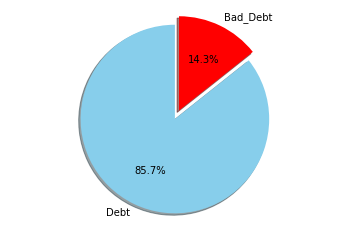

In [37]:
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

labels = 'Debt', 'Bad_Debt'
sizes = [df_train['debt'].mean()*100, df_train['bad_debt'].mean()*100]
colors = [ 'skyblue','red']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes,explode=explode,labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

#### Create Box and whisker plot and analyze the distribution for 2nd mortgage, home equity, good debt, and bad debt for different cities

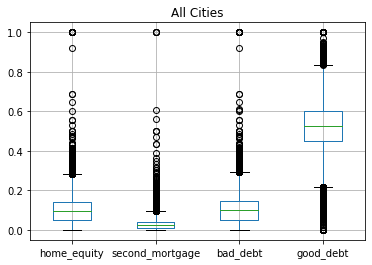

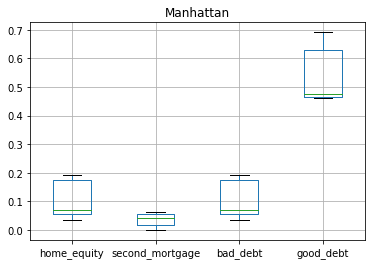

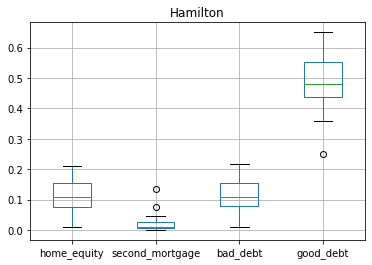

In [38]:
all_cities=df_train[['home_equity','second_mortgage','bad_debt', 'good_debt']]
all_cities.plot.box(grid=True)
plt.title('All Cities')
plt.show()

manhattan=df_train[df_train['city']=='Manhattan']
manhattan=manhattan[['home_equity','second_mortgage','bad_debt', 'good_debt']]
manhattan.plot.box(grid=True)
plt.title('Manhattan')
plt.show()

hamilton=df_train[df_train['city']=='Hamilton']
hamilton=hamilton[['home_equity','second_mortgage','bad_debt', 'good_debt']]
hamilton.plot.box(grid=True)
plt.title('Hamilton')
plt.show()

#### Create a collated income distribution chart for family income, house hold income, and remaining income

 

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

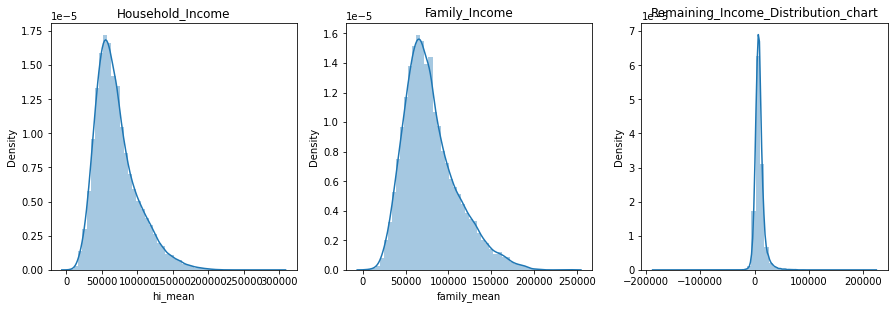

In [39]:
import seaborn as sns

import seaborn as sns
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.distplot(df_train['hi_mean'])
plt.title('Household_Income')

plt.subplot(2,3,2)
sns.distplot(df_train['family_mean'])
plt.title('Family_Income')

plt.subplot(2,3,3)
sns.distplot(df_train['family_mean']-df_train['hi_mean'])
plt.title('Remaining_Income_Distribution_chart')
plt.show()

## Project Task: Week 2

### Exploratory Data Analysis (EDA):

###  Perform EDA and come out with insights into population density and age. You may have to derive new fields (make sure to weight averages for accurate measurements):

#### Use pop and ALand variables to create a new field called population density

In [40]:
Pop_Density_train = df_train['pop'] / df_train['ALand']
Pop_Density_test  = df_test['pop']  /  df_test['ALand']
df_train['pop_density'] = Pop_Density_train
df_test['pop_density'] = Pop_Density_test

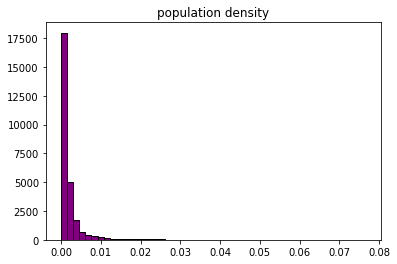

In [41]:
plt.hist(df_train['pop_density'], bins=50, color='purple', edgecolor='black')
plt.title('population density')
plt.show()

#### Use male_age_median, female_age_median, male_pop, and female_pop to create a new field called median age c) Visualize the findings using appropriate chart type

In [42]:
df_train["age_median"] = (df_train["male_age_median"]) + df_train["female_age_median"] / 2 
df_test["age_median"]  = (df_test["male_age_median"])  + df_test ["female_age_median"] / 2

In [43]:
df_train[["male_age_median", "female_age_median", "male_pop", "female_pop", "age_median" ]].head()

,male_age_median,female_age_median,male_pop,female_pop,age_median
UID,,,,,
267822,44.00000,45.33333,2612,2618,66.666665
246444,32.00000,37.58333,1349,1284,50.791665
245683,40.83333,42.83333,3643,3238,62.249995
279653,48.91667,50.58333,1141,1559,74.208335
247218,22.41667,21.58333,2586,3051,33.208335


### Create bins for population into a new variable by selecting appropriate class interval so that the number of categories don’t exceed 5 for the ease of analysis.

####  Analyze the married, separated, and divorced population for these population brackets

In [44]:
df_train['pop_bins'] = pd.cut(df_train['pop'], bins=5, labels=['very low','low','medium','high','very high'])
df_train['pop_bins'].value_counts()

very low     26901
low            246
medium           9
high             4
very high        1
Name: pop_bins, dtype: int64

In [45]:
df_train.groupby(by='pop_bins')[['married','separated','divorced']].count()

,married,separated,divorced
pop_bins,,,
very low,26901,26901,26901
low,246,246,246
medium,9,9,9
high,4,4,4
very high,1,1,1


In [46]:
df_train.groupby(by='pop_bins')[['married','separated','divorced']].agg(["mean", "median"])

married           separated            divorced          
               mean    median      mean    median      mean    median
pop_bins                                                             
very low   0.508546  0.525390  0.019109  0.013640  0.100634  0.096080
low        0.584894  0.593135  0.015833  0.011195  0.075348  0.070045
medium     0.655737  0.618710  0.005003  0.004120  0.065927  0.064890
high       0.629132  0.675095  0.012373  0.007340  0.060563  0.059870
very high  0.734740  0.734740  0.004050  0.004050  0.030360  0.030360

####  Visualize using appropriate chart type

<Figure size 720x360 with 0 Axes>

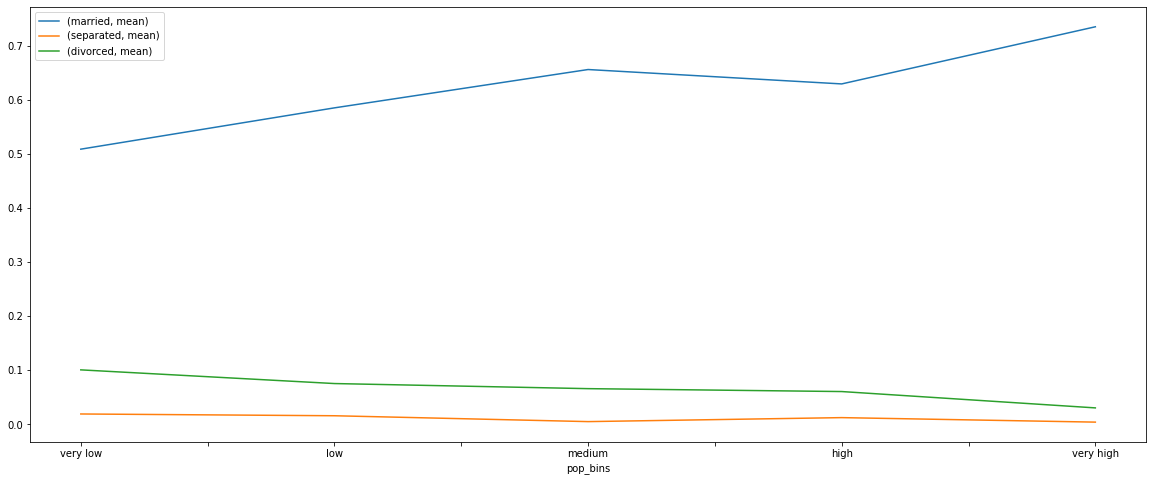

In [47]:
plt.figure(figsize=(10,5))
pop_bin_married=df_train.groupby(by='pop_bins')[['married','separated','divorced']].agg(["mean"])
pop_bin_married.plot(figsize=(20,8))
plt.legend(loc='best')
plt.show()

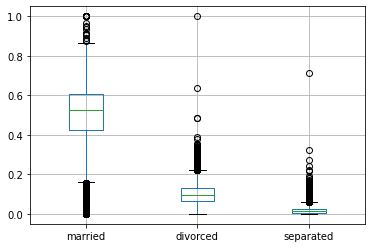

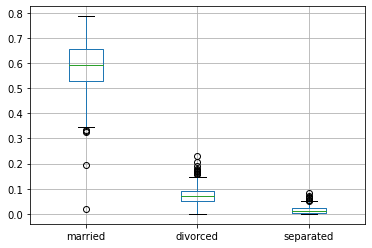

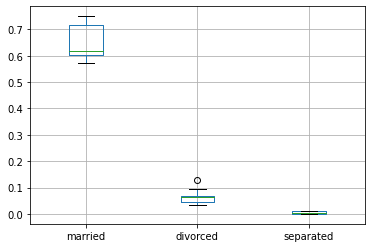

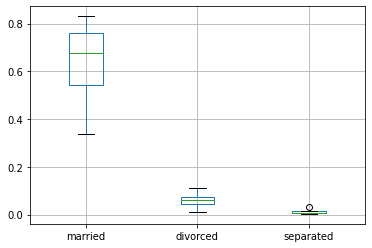

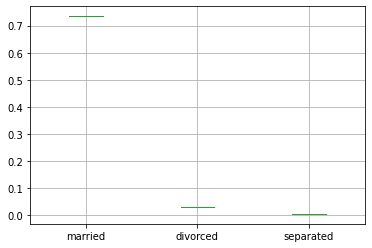

In [48]:
df_train.groupby(by='pop_bins')[['married','divorced', 'separated']].plot.box(grid='True')
plt.show()

####  Please detail your observations for rent as a percentage of income at an overall level, and for different states

In [49]:
rent_state_mean=df_train.groupby(by='state')['rent_mean'].agg(["mean"])
rent_state_mean.head()

,mean
state,
Alabama,774.006498
Alaska,1185.763570
Arizona,1098.689988
Arkansas,718.425272
California,1473.493903


In [50]:
income_state_mean=df_train.groupby(by='state')['family_mean'].agg(["mean"])
income_state_mean.head()

,mean
state,
Alabama,67030.487478
Alaska,92136.545109
Arizona,73390.637993
Arkansas,64409.153057
California,87831.121491


In [51]:
rent_perc_of_income=rent_state_mean['mean']/income_state_mean['mean']
rent_perc_of_income.head(10)

state
Alabama                 0.011547
Alaska                  0.012870
Arizona                 0.014970
Arkansas                0.011154
California              0.016776
Colorado                0.013554
Connecticut             0.012612
Delaware                0.012929
District of Columbia    0.013196
Florida                 0.015789
Name: mean, dtype: float64

In [52]:
sum(df_train['rent_mean'])/sum(df_train['family_mean'])

0.013351076774049805

####  Perform correlation analysis for all the relevant variables by creating a heatmap. Describe your findings.



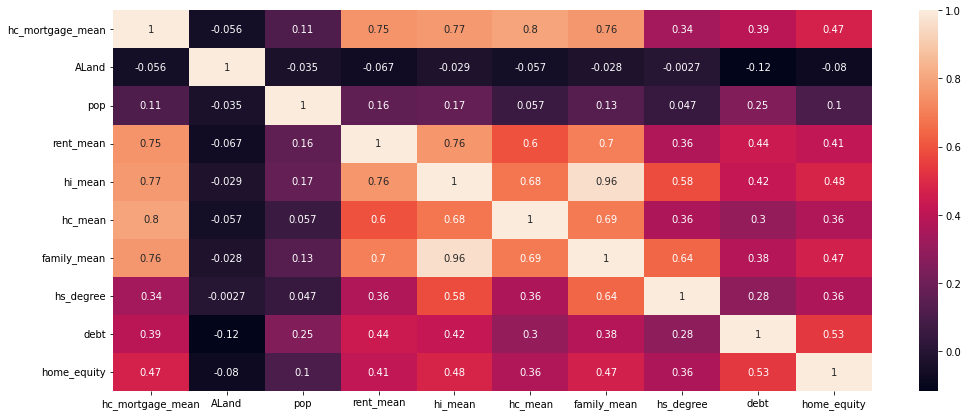

In [53]:
plt.figure(figsize=(17,7))
sns.heatmap(data=df_train[['hc_mortgage_mean','ALand','pop','rent_mean','hi_mean','hc_mean','family_mean',
                           'hs_degree','debt','home_equity']].corr(),annot=True)
plt.show()

## Project Task: Week 3

### Data Pre-processing:



#### 1. The economic multivariate data has a significant number of measured variables. The goal is to find where the measured variables depend on a number of smaller unobserved common factors or latent variables. 2. Each variable is assumed to be dependent upon a linear combination of the common factors, and the coefficients are known as loadings. Each measured variable also includes a component due to independent      random variability, known as “specific variance” because it is specific to one variable. Obtain the common factors and then plot the loadings. Use factor analysis to find latent variables in our dataset and gain          insight into the linear relationships in the data. Following are the list of latent variables:

• Highschool graduation rates

• Median population age

• Second mortgage statistics

• Percent own

• Bad debt expense

 

In [54]:
pip install factor_analyzer

Defaulting to user installation because normal site-packages is not writeable
  Using cached importlib_metadata-6.0.0-py3-none-any.whl (21 kB)
  Using cached filelock-3.9.0-py3-none-any.whl (9.7 kB)
  Using cached typing_extensions-4.4.0-py3-none-any.whl (26 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
konoha 4.6.5 requires overrides<4.0.0,>=3.0.0, which is not installed.
flair 0.8.1 requires more-itertools~=8.8.0, but you have more-itertools 8.2.0 which is incompatible.
konoha 4.6.5 requires importlib-metadata<4.0.0,>=3.7.0, but you have importlib-metadata 6.0.0 which is incompatible.
konoha 4.6.5 requires requests<3.0.0,>=2.25.1, but you have requests 2.23.0 which is incompatible.
You should consider upgrading via the '/usr/local/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [55]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer

In [57]:
df_train.isna().sum().sum()

0

In [58]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
COUNTYID,27161.0,85.660322,98.373195,1.000000,29.000000,63.000000,109.000000,840.000000
STATEID,27161.0,28.267185,16.385918,1.000000,13.000000,28.000000,42.000000,72.000000
zip_code,27161.0,50105.133243,29546.218041,602.000000,26847.000000,47804.000000,77093.000000,99925.000000
area_code,27161.0,596.589816,232.424069,201.000000,405.000000,614.000000,801.000000,989.000000
lat,27161.0,37.519180,5.585968,17.929085,33.906105,38.760645,41.393414,67.074018
...,...,...,...,...,...,...,...,...
divorced,27161.0,0.100385,0.048673,0.000000,0.066210,0.095660,0.128830,1.000000
bad_debt,27161.0,0.105161,0.070420,0.000000,0.052840,0.100190,0.148650,1.000000
good_debt,27161.0,0.524461,0.129606,0.000000,0.449290,0.525880,0.604360,1.000000
pop_density,27161.0,0.002044,0.004509,0.000000,0.000121,0.000851,0.002056,0.076536


In [59]:
fa=FactorAnalyzer(n_factors=5)
fa.fit_transform(df_train.select_dtypes(exclude= ('object','category')))
fa.loadings_

array([[-1.15759081e-01,  2.00055216e-02, -2.45611427e-02,
        -6.06708735e-02,  3.61941512e-02],
       [-1.11084214e-01,  1.60955276e-02,  2.22636663e-02,
        -1.46779071e-01,  1.11935708e-01],
       [-9.13208725e-02,  4.64320589e-02, -1.16766671e-01,
        -4.90561732e-02, -1.24977866e-01],
       [ 1.52239891e-02,  1.75423622e-02,  6.67313507e-03,
         2.90478833e-02, -1.06904322e-02],
       [ 9.27260128e-02, -1.01923154e-01, -4.22379777e-02,
        -1.36160228e-01, -1.47031785e-01],
       [-3.81436319e-03, -3.58193367e-02,  1.30148637e-01,
         8.97438385e-03,  1.28595596e-01],
       [-4.30877758e-02, -2.12163745e-02,  3.69486367e-02,
        -9.17297628e-02,  6.37042910e-02],
       [-2.55233407e-03, -1.54595736e-02, -2.23485195e-03,
        -4.38247409e-02,  2.45609081e-02],
       [ 7.76247211e-02,  9.54839681e-01, -9.62874649e-02,
        -3.51584474e-03, -6.49488480e-02],
       [ 6.97454223e-02,  9.20491780e-01, -1.10935333e-01,
        -2.37741196e-02

## Data Modeling :

### Build a linear Regression model to predict the total monthly expenditure for home mortgages loan. Please refer ‘deplotment_RE.xlsx’. Column hc_mortgage_mean is predicted variable. This is the mean monthly     mortgage and owner costs of specified geographical location. Note: Exclude loans from prediction model which have NaN (Not a Number) values for hc_mortgage_mean.

#### a) Run a model at a Nation level. If the accuracy levels and R square are not satisfactory proceed to below step.

b) Run another model at State level. There are 52 states in USA.

c) Keep below considerations while building a linear regression model. Data Modeling :

• Variables should have significant impact on predicting Monthly mortgage and owner costs

• Utilize all predictor variable to start with initial hypothesis

• R square of 60 percent and above should be achieved

• Ensure Multi-collinearity does not exist in dependent variables

• Test if predicted variable is normally distributed

In [60]:
df_train.columns

Index(['COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type',
       'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater', 'pop',
       'male_pop', 'female_pop', 'rent_mean', 'rent_median', 'rent_stdev',
       'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15',
       'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40',
       'rent_gt_50', 'universe_samples', 'used_samples', 'hi_mean',
       'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 'hs_degree_

In [61]:
df_train['type'].unique()

array(['City', 'Urban', 'Town', 'CDP', 'Village', 'Borough'], dtype=object)

In [62]:
type_dict={'type':{'City':1, 'Urban':2, 'Town':3, 'CDP':4, 'Village':5, 'Borough':6}}
df_train.replace(type_dict,inplace=True)

In [63]:
df_test.replace(type_dict,inplace=True)

In [64]:
df_train['type'].unique()

array([1, 2, 3, 4, 5, 6])

In [65]:
feature_cols=['COUNTYID','STATEID','zip_code','type','pop', 'family_mean','second_mortgage', 'home_equity', 'debt','hs_degree',
              'age_median','pct_own', 'married','separated', 'divorced']

In [66]:
xtrain=df_train[feature_cols]
ytrain=df_train['hc_mortgage_mean']

In [67]:
xtest=df_test[feature_cols]
ytest=df_test['hc_mortgage_mean']

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error,accuracy_score

In [69]:
xtest.head()

,COUNTYID,STATEID,zip_code,type,pop,family_mean,second_mortgage,home_equity,debt,hs_degree,age_median,pct_own,married,separated,divorced
UID,,,,,,,,,,,,,,,
255504,163,26,48239,4,3417,53802.87122,0.06443,0.07651,0.63624,0.91047,44.708330,0.70252,0.28217,0.03813,0.14299
252676,1,23,4210,1,3796,85642.22095,0.01175,0.14375,0.64755,0.94290,69.416665,0.85128,0.64221,0.00000,0.13377
276314,15,42,14871,6,3944,65694.06582,0.01316,0.06497,0.45395,0.89238,64.166670,0.81897,0.59961,0.01358,0.10026
248614,231,21,42633,1,2508,44156.38709,0.00995,0.01741,0.41915,0.60908,67.000000,0.84609,0.56953,0.04694,0.12489
286865,355,48,78410,3,6230,123527.02420,0.00000,0.03440,0.63188,0.86297,65.083335,0.79077,0.57620,0.00588,0.16379


In [70]:
sc=StandardScaler()
xtrain_scaled=sc.fit_transform(xtrain)
xtest_scaled=sc.fit_transform(xtest)

In [71]:
lr=LinearRegression()
lr.fit(xtrain_scaled,ytrain)

LinearRegression()

In [72]:
ypred= lr.predict(xtest_scaled)

In [73]:
print("Overall R2 score of linear regression model", r2_score(ytest,ypred))
print("Overall RMSE of linear regression model", np.sqrt(mean_squared_error(ytest,ypred)))

Overall R2 score of linear regression model 0.7393650505184304
Overall RMSE of linear regression model 320.4641119170825


In [74]:
state=df_train['STATEID'].unique()
state

array([36, 18, 72, 20,  1, 48, 45,  6,  5, 24, 17, 19, 47, 32, 22,  8, 44,
       28, 34, 41,  4, 12, 55, 42, 37, 51, 26, 39, 40, 13, 16, 46, 27, 29,
       53, 56,  9, 54, 21, 25, 11, 15, 30,  2, 33, 49, 50, 31, 38, 35, 23,
       10])

In [75]:
for i in [11,33,35]:
    print("State ID-",i)

    xtrain_nation=df_train[df_train['COUNTYID']==i][feature_cols]
    ytrain_nation=df_train[df_train['COUNTYID']==i]['hc_mortgage_mean']
    
    xtest_nation=df_test[df_test['COUNTYID']==i][feature_cols]
    ytest_nation=df_test[df_test['COUNTYID']==i]['hc_mortgage_mean']
    
    xtrain_scaled_nation=sc.fit_transform(xtrain_nation)
    xtest_scaled_nation=sc.fit_transform(xtest_nation)
    
    lr.fit(xtrain_scaled_nation,ytrain_nation)
    ypred_nation=lr.predict(xtest_scaled_nation)
    
    print("Overall R2 score of linear regression model for state,",i,":-" ,r2_score(ytest_nation,ypred_nation))
    print("Overall RMSE of linear regression model for state,",i,":-" ,np.sqrt(mean_squared_error(ytest_nation,ypred_nation)))
    print("\n")

State ID- 11
Overall R2 score of linear regression model for state, 11 :- 0.7466965040298003
Overall RMSE of linear regression model for state, 11 :- 238.00669942760942


State ID- 33
Overall R2 score of linear regression model for state, 33 :- 0.8615110128116417
Overall RMSE of linear regression model for state, 33 :- 211.17226657126835


State ID- 35
Overall R2 score of linear regression model for state, 35 :- 0.719056112896151
Overall RMSE of linear regression model for state, 35 :- 258.272541473138




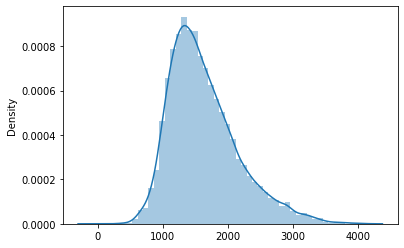

In [76]:
sns.distplot(ypred)
plt.show()

## Data Reporting:

####  Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

a) Box plot of distribution of average rent by type of place (village, urban, town, etc.).

b) Pie charts to show overall debt and bad debt.

c) Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 percent. Visualize using geo-map.

d) Heat map for correlation matrix.

e) Pie chart to show the population distribution across different types of places (village, urban, town etc.)

